<a href="https://colab.research.google.com/github/jyothsna1076/AnamolyDetectionPRMLProject/blob/main/RandomForestPRML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
# import numpy as np
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# df= pd.read_csv("Train_data.csv")

# def le(df):
#     for col in df.columns:
#         if df[col].dtype == 'object':
#                 label_encoder = LabelEncoder()
#                 df[col] = label_encoder.fit_transform(df[col])

# le(df)
# x=  df.drop("class",axis= 1)
# y= df["class"]
# x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)
# rf_classifier= RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(x_train,y_train)
# # test_df= pd.read_csv("Test_data.csv")
# # x_test= test_df.drop("class")
# # y_test= test_df["class"]
# predictions= rf_classifier.predict(x_test)
# accuracy= accuracy_score(y_test, predictions)
# print(f"Accuracy: {accuracy}")

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
np.random.seed(42)
df= pd.read_csv("Train_data.csv")
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(df)
x=  df.drop("class",axis= 1)
y= df["class"]
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)


In [156]:
from collections import Counter

class MyRandomForest:
    def __init__(self, n_trees=10,sample_ratio=0.3, max_depth=None, n_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_ratio = sample_ratio
        self.n_features = n_features
        self.trees = []

    def bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, int(n_samples* self.sample_ratio), replace=True)
        return X.iloc[indices], y.iloc[indices]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                max_features=self.n_features,
                # random_state= 42
            )
            tree.fit(X_sample, y_sample)
            # plt.figure(figsize=(30, 20))
            # plot_tree(tree)
            # plt.show()
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        final_predictions = []

        for sample_preds in tree_predictions.T:
            # Majority vote
            vote = Counter(sample_preds).most_common(1)[0][0]
            final_predictions.append(vote)

        return np.array(final_predictions)

Row Sampling


In [157]:
# # function for row sampling

# def sample_rows(df,percent):
#   return df.sample(int(percent*df.shape[0]), replace=True)


In [158]:
rf = MyRandomForest(n_trees=5, max_depth=None, n_features=None)

# Fit the model on your dataset
rf.fit(x_train, y_train)

# Predict
y_pred = rf.predict(x_test)

# Evaluate
from sklearn.metrics import accuracy_score
print("Accuracy on your dataset:", accuracy_score(y_test, y_pred))

Accuracy on your dataset: 0.9958325064496923


In [159]:
def run_experiment(X, y, sample_ratio=0.3, max_depth=None, test_size=0.2):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    accuracies = []

    for n_trees in range(1,15):
        model = MyRandomForest(n_trees=n_trees, sample_ratio=sample_ratio, max_depth=max_depth,n_features=None)
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)
        accuracies.append(acc)
        print(f"{n_trees} trees → Accuracy: {acc:.4f}")

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 15), accuracies, marker='o')
    plt.xlabel("Number of Trees")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs. Number of Trees (sample_ratio={sample_ratio}, max_depth={max_depth})")
    plt.grid(True)
    plt.show()


1 trees → Accuracy: 0.9905
2 trees → Accuracy: 0.9936
3 trees → Accuracy: 0.9946
4 trees → Accuracy: 0.9964
5 trees → Accuracy: 0.9962
6 trees → Accuracy: 0.9964
7 trees → Accuracy: 0.9970
8 trees → Accuracy: 0.9964
9 trees → Accuracy: 0.9972
10 trees → Accuracy: 0.9966
11 trees → Accuracy: 0.9970
12 trees → Accuracy: 0.9978
13 trees → Accuracy: 0.9976
14 trees → Accuracy: 0.9962


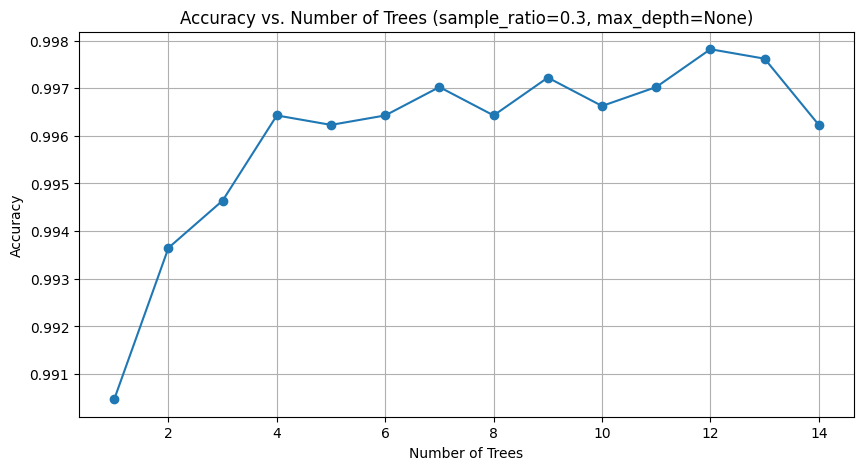

In [160]:
run_experiment(x,y)

In [161]:
def experiment_sampling_effect(X, y, tree_count=10, max_depth=None, test_size=0.2):
    sample_ratios = np.linspace(0.1, 1.0, 10)  # 10 values from 0.1 to 1.0
    accuracies = []

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    for ratio in sample_ratios:
        model = MyRandomForest(n_trees=tree_count, sample_ratio=ratio, max_depth=max_depth)
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)
        accuracies.append(acc)
        print(f"Sampling Ratio: {ratio:.2f} → Accuracy: {acc:.4f}")

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(sample_ratios, accuracies, marker='o')
    plt.xlabel("Sampling Ratio (Fraction of Training Data per Tree)")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs. Sampling Ratio (Trees={tree_count}, max_depth={max_depth})")
    plt.grid(True)
    plt.show()


Sampling Ratio: 0.10 → Accuracy: 0.9960
Sampling Ratio: 0.20 → Accuracy: 0.9960
Sampling Ratio: 0.30 → Accuracy: 0.9966
Sampling Ratio: 0.40 → Accuracy: 0.9968
Sampling Ratio: 0.50 → Accuracy: 0.9974
Sampling Ratio: 0.60 → Accuracy: 0.9980
Sampling Ratio: 0.70 → Accuracy: 0.9986
Sampling Ratio: 0.80 → Accuracy: 0.9974
Sampling Ratio: 0.90 → Accuracy: 0.9976
Sampling Ratio: 1.00 → Accuracy: 0.9978


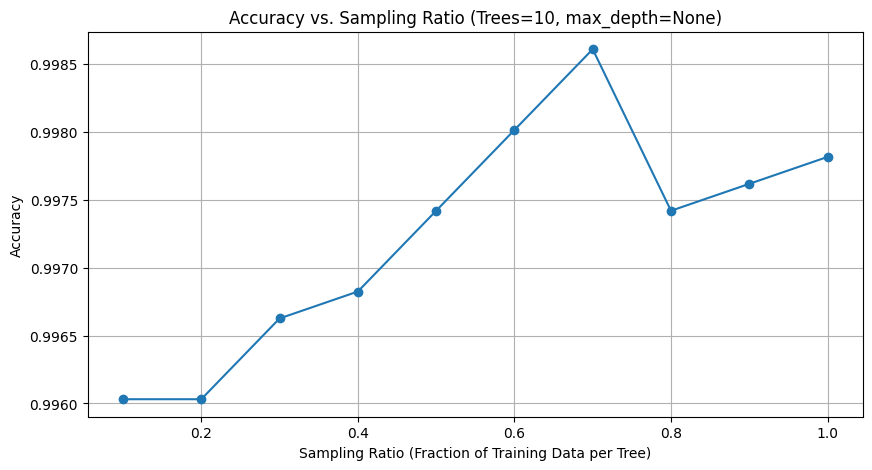

In [162]:
experiment_sampling_effect(x,y)

In [163]:
def experiment_depth_effect(X, y, n_trees=10, sample_ratio=0.3, test_size=0.2):
    depths = list(range(1, 16))  # max_depth from 1 to 15
    accuracies = []

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    for depth in depths:
        model = MyRandomForest(n_trees=n_trees, sample_ratio=sample_ratio, max_depth=depth)
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)
        accuracies.append(acc)
        print(f"Depth: {depth} → Accuracy: {acc:.4f}")

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(depths, accuracies, marker='o')
    plt.xlabel("Max Depth of Trees")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs. Tree Depth (Trees={n_trees}, sample_ratio={sample_ratio})")
    plt.grid(True)
    plt.show()


Depth: 1 → Accuracy: 0.9266
Depth: 2 → Accuracy: 0.9518
Depth: 3 → Accuracy: 0.9712
Depth: 4 → Accuracy: 0.9808
Depth: 5 → Accuracy: 0.9893
Depth: 6 → Accuracy: 0.9935
Depth: 7 → Accuracy: 0.9956
Depth: 8 → Accuracy: 0.9954
Depth: 9 → Accuracy: 0.9972
Depth: 10 → Accuracy: 0.9960
Depth: 11 → Accuracy: 0.9970
Depth: 12 → Accuracy: 0.9966
Depth: 13 → Accuracy: 0.9962
Depth: 14 → Accuracy: 0.9964
Depth: 15 → Accuracy: 0.9962


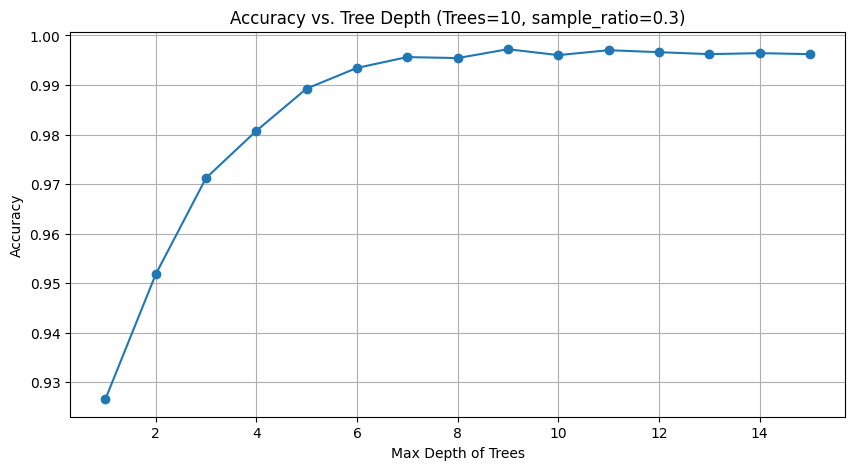

In [164]:
experiment_depth_effect(x,y)

In [165]:
from itertools import product

def grid_search_rf(X, y, sample_ratios, tree_counts, depths, test_size=0.2):
    best_acc = 0
    best_params = None
    results = []

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    for sample_ratio, n_trees, max_depth in product(sample_ratios, tree_counts, depths):
        model = MyRandomForest(n_trees=n_trees, sample_ratio=sample_ratio, max_depth=max_depth)
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)
        results.append((acc, sample_ratio, n_trees, max_depth))
        print(f"Sample: {sample_ratio}, Trees: {n_trees}, Depth: {max_depth} → Accuracy: {acc:.4f}")

        if acc > best_acc:
            best_acc = acc
            best_params = (sample_ratio, n_trees, max_depth)

    print("\nBest Configuration:")
    print(f"Sample Ratio: {best_params[0]}, Trees: {best_params[1]}, Max Depth: {best_params[2]} → Accuracy: {best_acc:.4f}")

    return best_params


In [166]:
sample_ratios = [0.3, 0.5, 0.7, 1.0]
n_trees_options = [5, 10, 15]
max_depths = [3, 5, 10, None]


In [167]:
best_sample, best_trees, best_depth = grid_search_rf(x, y, sample_ratios, n_trees_options, max_depths)

final_model = MyRandomForest(n_trees=best_trees, sample_ratio=best_sample, max_depth=best_depth)
final_model.fit(x_train, y_train)
final_preds = final_model.predict(x_test)
final_acc = accuracy_score(y_test, final_preds)

print(f"Final Model Accuracy: {final_acc:.4f}")


Sample: 0.3, Trees: 5, Depth: 3 → Accuracy: 0.9710
Sample: 0.3, Trees: 5, Depth: 5 → Accuracy: 0.9835
Sample: 0.3, Trees: 5, Depth: 10 → Accuracy: 0.9944
Sample: 0.3, Trees: 5, Depth: None → Accuracy: 0.9958
Sample: 0.3, Trees: 10, Depth: 3 → Accuracy: 0.9696
Sample: 0.3, Trees: 10, Depth: 5 → Accuracy: 0.9933
Sample: 0.3, Trees: 10, Depth: 10 → Accuracy: 0.9962
Sample: 0.3, Trees: 10, Depth: None → Accuracy: 0.9968
Sample: 0.3, Trees: 15, Depth: 3 → Accuracy: 0.9698
Sample: 0.3, Trees: 15, Depth: 5 → Accuracy: 0.9909
Sample: 0.3, Trees: 15, Depth: 10 → Accuracy: 0.9972
Sample: 0.3, Trees: 15, Depth: None → Accuracy: 0.9970
Sample: 0.5, Trees: 5, Depth: 3 → Accuracy: 0.9696
Sample: 0.5, Trees: 5, Depth: 5 → Accuracy: 0.9925
Sample: 0.5, Trees: 5, Depth: 10 → Accuracy: 0.9978
Sample: 0.5, Trees: 5, Depth: None → Accuracy: 0.9962
Sample: 0.5, Trees: 10, Depth: 3 → Accuracy: 0.9696
Sample: 0.5, Trees: 10, Depth: 5 → Accuracy: 0.9857
Sample: 0.5, Trees: 10, Depth: 10 → Accuracy: 0.9974
Sam